In [80]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

# MATPLOTLIB CONFIG

def conf_axis(ax, xmax=10, ymax=10, xmin=-10, ymin=-10):
    for ind, subplot in np.ndenumerate(ax):
        # Set axis ranges; by default this will put major ticks every 25.
        subplot.set_xlim(xmin, xmax)
        subplot.set_ylim(ymin, ymax)
        
        # Change major ticks to show every 1.
        subplot.xaxis.set_major_locator(MultipleLocator(int((xmax-xmin)/10+1)))
        subplot.yaxis.set_major_locator(MultipleLocator(int((ymax-ymin)/10+1)))

        # Change minor ticks to show every .5. (1/4 = .25)
        subplot.xaxis.set_minor_locator(AutoMinorLocator(2))
        subplot.yaxis.set_minor_locator(AutoMinorLocator(2))

        # Turn grid on for both major and minor ticks and style minor slightly differently.
        subplot.grid(which='major', color='#CCCCCC')
        subplot.grid(which='minor', color='#CCCCCC', linestyle='--')


# Splines

## Intro: Polynomials

They are _polynomials_:

$$
\sum_{i=0}^self.n a_i x^n = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n.
$$

The **degree** (or **order**) of a polynomial is the highest power of the variables. Polynomials of different degrees are given names: linear, quadratic, cubic, quartic... The higher the degree, the more changes of direction the polynomial can have.

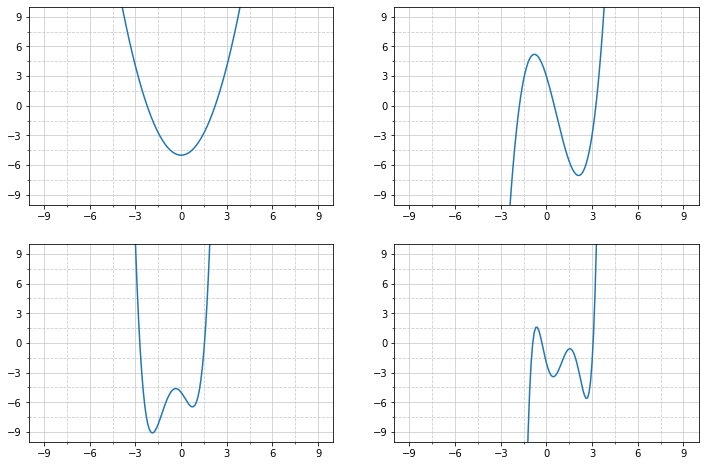

In [81]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
conf_axis(ax)

x = np.arange(-10, 10, 0.1)
ax[0, 0].plot(x, x**2 - 5)
ax[0, 1].plot(x, x**3 - 2*x**2 - 5*x + 3)
ax[1, 0].plot(x, x**4 + 2*x**3 - 2*x**2 - 2*x - 5)
ax[1, 1].plot(x, x**5 - 5*x**4 + 5*x**3 + 5*x**2 - 6*x - 2)
plt.show()

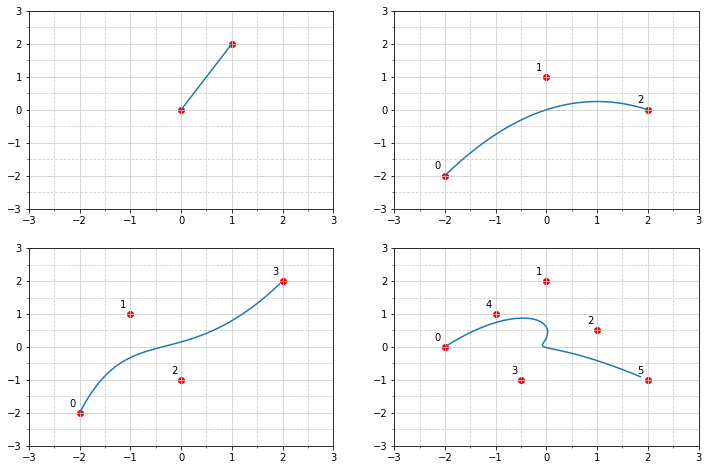

In [97]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
conf_axis(ax,3,3,-3,-3)

t = np.arange(0, 1, 0.01)

# Straight line parametric equations
x_0 = 0
x_1 = 1
y_0 = 0
y_1 = 2
x_t = (1-t) * x_0 + t * x_1
y_t = (1-t) * y_0 + t * y_1
ax[0,0].plot(x_t, y_t)
ax[0,0].scatter([x_0, x_1], [y_0, y_1], color='r')

import math

class BezierCurve:
    def __init__(self, n, P):
        self.n = n
        self.n_ext = n+1
        self.P = P # A numpy.array of size: dim X n+1
        self.precomputeBernsCoeff()

    def precomputeBernsCoeff(self):
        self.M = np.zeros((self.n_ext,self.n_ext))
        for j in range(0, self.n_ext):
            for i in range(0, j+1):
                self.M[i,j] = self.mop(j - i) * self.binomial(self.n - i, j - i) * self.binomial(self.n ,i)
        self.PM = self.P @ self.M

    def evaluate(self, t):
        T = np.zeros((self.n_ext, t.shape[0]))
        for i in range(0, self.n_ext):
            T[i] = t**i
        return self.PM @ T


    def plotBernstein(self, ax):
        x = np.linspace(0,1, 100)
        for i in range(self.n):
            ax.plot(x, self.bernsteinPolynomial(i, self.n-1, x))

    def bernsteinPolynomial(self, i, n, t):
        return self.binomial(n,i) * t**i * (1 - t)**(n-i)

    def binomial(self,n,r):
        return math.factorial(n) // math.factorial(r) // math.factorial(n-r)

    def mop(self, i):
        if((i%2)==0):
            return 1
        else:
            return -1

p = np.array([[-2, 0, 2], [-2, 1, 0]])
curv = BezierCurve(2, p)
c_t = curv.evaluate(t)
ax[0,1].plot(c_t[0,:], c_t[1,:])
ax[0,1].scatter(p[0,:], p[1,:],color='r')
for i in range(p.shape[1]):
    ax[0,1].annotate(i, (p[0,i]-0.2, p[1,i]+0.2))


p = np.array([[-2, -1, 0, 2], [-2, 1, -1, 2]])
curv = BezierCurve(3, p)
c_t = curv.evaluate(t)
ax[1,0].plot(c_t[0,:], c_t[1,:])
ax[1,0].scatter(p[0,:], p[1,:],color='r')
for i in range(p.shape[1]):
    ax[1,0].annotate(i, (p[0,i]-0.2, p[1,i]+0.2))

p = np.array([[-2, 0, 1, -0.5, -1, 2], [0, 2, 0.5, -1, 1, -1]])
curv = BezierCurve(5, p)
c_t = curv.evaluate(t)
ax[1,1].plot(c_t[0,:], c_t[1,:])
ax[1,1].scatter(p[0,:], p[1,:],color='r')
for i in range(p.shape[1]):
    ax[1,1].annotate(i, (p[0,i]-0.2, p[1,i]+0.2))
plt.show()

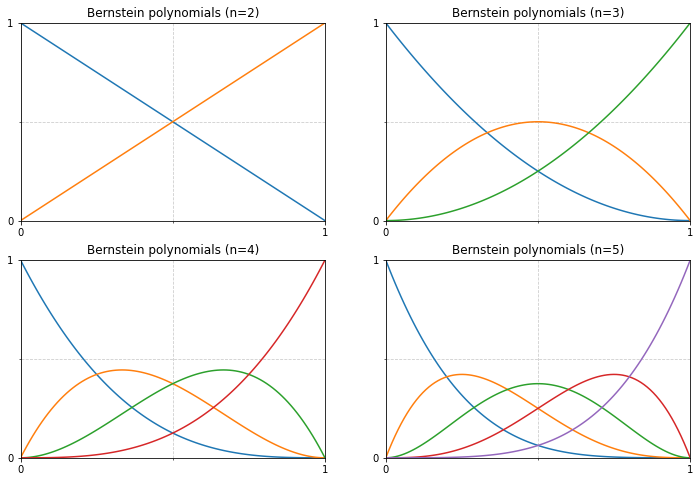

In [104]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
conf_axis(ax,1,1,0,0)

ax[0,0].title.set_text("Bernstein polynomials (n=2)")
p = np.array([[-2, 0, 2], [-2, 1, 0]])
curv = BezierCurve(2, p)
curv.plotBernstein(ax[0,0])

ax[0,1].title.set_text("Bernstein polynomials (n=3)")
p = np.array([[-2, -1, 0, 2], [-2, 1, -1, 2]])
curv = BezierCurve(3, p)
curv.plotBernstein(ax[0,1])

ax[1,0].title.set_text("Bernstein polynomials (n=4)")
p = np.array([[-2, 0, 1, -0.5, -1], [0, 2, 0.5, -1, 1]])
curv = BezierCurve(4, p)
curv.plotBernstein(ax[1,0])

ax[1,1].title.set_text("Bernstein polynomials (n=5)")
p = np.array([[-2, 0, 1, -0.5, -1, 2], [0, 2, 0.5, -1, 1, -1]])
curv = BezierCurve(5, p)
curv.plotBernstein(ax[1,1])

plt.show()